In [112]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

In [91]:
# data generator

class DataSimulor:
    @staticmethod
    def draw_line(f, xmin=0, xmax=10):
        x = np.linspace(xmin, xmax)
        y = f(x)
        plt.plot(x, y, 'r')
        
    @staticmethod
    def get_data(f, xmin=0, xmax=10, space=0.01, lamda=0.1):
        x = np.arange(xmin, xmax, space)
        y = f(x)
        factor = 2 * lamda * np.random.random(x.size) - lamda + 1
        return (x, y * factor)
        

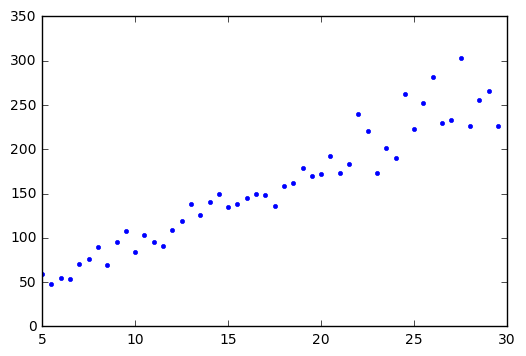

In [92]:
def f(x):
    return 9 * x + 5

def sigmoid(x):
    return np.ones(x.size) / (1 + np.exp(-x))

(x, y) = DataSimulor.get_data(f, xmin=5, xmax=30, space=0.5, lamda=0.2)
plt.plot(x, y, '.')

### 公式解析：
- 梯度下降（GD）更新公式：
$$  \frac{\partial J(\theta)}{\partial \theta_i} = (h_\theta(x^{(i)}) - y^{(i)}) x_{j}^{(i)}$$
- 随机梯度下降（SGD）更新公式：
$$  \frac{\partial J(\theta)}{\partial \theta_i} = \sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)}) x_{j}^{(i)}$$

In [93]:
def gd(theta, x, y, i, j):
    return (y[i] - np.dot(theta, x[i, :])) * x[i, j]

def sgd(theta, x, y, i, j):
    return sum([gd(theta, x, y, m, j) for m in xrange(x.shape[0])])

In [94]:
def linear_regression(x, y, dim=1, lr=0.001):
    n = x.shape[0]
    try:
        feature = x.shape[1]
    except IndexError:
        feature = 2
        
    theta = np.random.random(dim + 1)
    x = np.append(np.ones(n), x).reshape(2, n).transpose()
    
    # print theta
    step = 0
    # training
    while(True):         
        i = step % n
        last_theta = copy.copy(theta)
        
        for j in xrange(feature):
            theta[j] += lr * sgd(theta, x, y, i, j)

        diff = theta - last_theta
        # print theta, last_theta, diff, np.dot(diff, diff)
        step += 1
        if(np.dot(diff, diff) < 0.0001 or step > 1000):
            break
            
    plt.plot(x[:, 1], y, '.')
    DataSimulor.draw_line(lambda x: theta[1] * x + theta[0],xmin=5, xmax=30)
    

In [ ]:
(x, y) = DataSimulor.get_data(f, xmin=5, xmax=30, space=0.2, lamda=0.3)

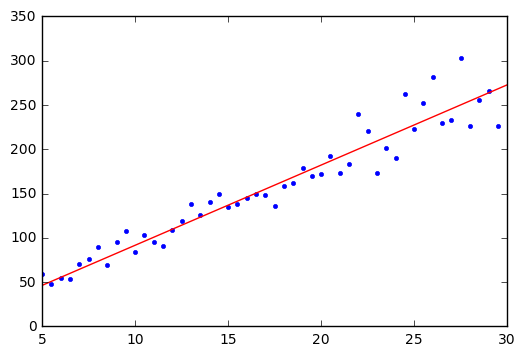

In [109]:
linear_regression(x, y, lr=0.00004)